# MNIST Handwritten Digit Classifier

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [55]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

In [56]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [57]:
# Define transforms
from torchvision import transforms

data_transform = transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
train_set = torchvision.datasets.MNIST('root', train = True, download = True, transform = data_transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 20, shuffle = True)

# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST('root', train = False, download = True, transform = data_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 20)

We chose the conversion of the image data to tensor and did not use any other normalization method as the images are already cropped out and do not require normalization.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

In [58]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

9


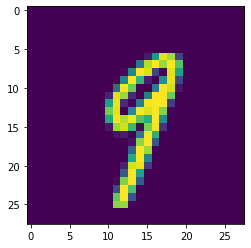

7


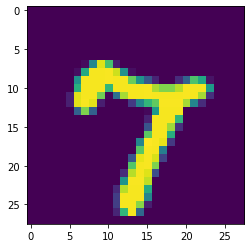

9


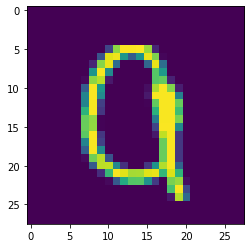

6


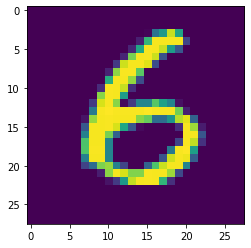

6


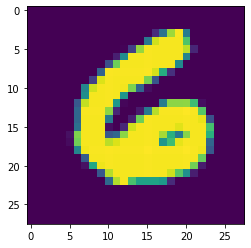

In [59]:
# Explore data
show5(train_loader)

In [60]:
dataiter = iter(train_loader)
    
batch = next(dataiter)
labels = batch[1][1]
images = batch[0][1]
imageex = batch[0][1]
print("The shape of labels is: {}, with the label {}\nThe shape of images is {} and image format is {}".format(labels.shape, labels, images.shape, imageex))

The shape of labels is: torch.Size([]), with the label 0
The shape of images is torch.Size([1, 28, 28]) and image format is tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
       

## Build the Neural Network

In [79]:
## YOUR CODE HERE ##
class Net(nn.Module):
    
    def __init__(self):
        
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.out = nn.Linear(256, 10)
        
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        
        x = x.view(-1, 28*28)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.out(x)
        
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [62]:
if(torch.cuda.is_available()):
    device = 'cuda'
    model = model.to('cuda')
else:
    device = 'cpu'

In [80]:
optimizer = torch.optim.SGD(model.parameters(), lr  = 0.02)
criterion = nn.CrossEntropyLoss()

## Running the Neural Network

In [81]:
num_epochs = 6

train_loss_history = list()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1}, training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

Epoch 1, training loss: 0.59179
Epoch 2, training loss: 0.23701
Epoch 3, training loss: 0.17013
Epoch 4, training loss: 0.13234
Epoch 5, training loss: 0.10892
Epoch 6, training loss: 0.09259


## Testing the model

In [82]:
val_correct = 0
all_count = 0

for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    
    if(true_label == pred_label):
      val_correct += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (val_correct/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9678


## Improving the model


In [70]:
## YOUR CODE HERE ##
optimized_model = Net()
optimizer = torch.optim.SGD(optimized_model.parameters(), lr  = 0.01)

num_epochs = 20
train_loss_history = list()

for epoch in range(num_epochs):
    optimized_model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = optimized_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        
    print(f'Epoch {epoch + 1}, training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

Epoch 1, training loss: 0.87277
Epoch 2, training loss: 0.33529
Epoch 3, training loss: 0.25595
Epoch 4, training loss: 0.20829
Epoch 5, training loss: 0.17562
Epoch 6, training loss: 0.15191
Epoch 7, training loss: 0.13370
Epoch 8, training loss: 0.11787
Epoch 9, training loss: 0.10729
Epoch 10, training loss: 0.09820
Epoch 12, training loss: 0.08375
Epoch 13, training loss: 0.07640
Epoch 14, training loss: 0.07092
Epoch 15, training loss: 0.06682
Epoch 16, training loss: 0.06259
Epoch 17, training loss: 0.05856
Epoch 18, training loss: 0.05536
Epoch 19, training loss: 0.05162
Epoch 20, training loss: 0.04942


In [78]:
val_correct = 0
all_count = 0

for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = optimized_model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    
    if(true_label == pred_label):
        val_correct += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (val_correct/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9772


## Saving model

In [86]:
torch.save(model, './MNIST-classifier.pt')